In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import sys
!{sys.executable} -m pip install xgboost
import xgboost as xgb

In [2]:
df = pd.read_csv('Heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
for i in df:
    print(df[[i]].isnull().sum())

age    0
dtype: int64
sex    0
dtype: int64
cp    0
dtype: int64
trestbps    0
dtype: int64
chol    0
dtype: int64
fbs    0
dtype: int64
restecg    0
dtype: int64
thalach    0
dtype: int64
exang    0
dtype: int64
oldpeak    0
dtype: int64
slope    0
dtype: int64
ca    0
dtype: int64
thal    0
dtype: int64
target    0
dtype: int64


In [8]:
df = df.dropna(axis=0)

In [9]:
X = df.drop('target', axis=1)
y = df['target']

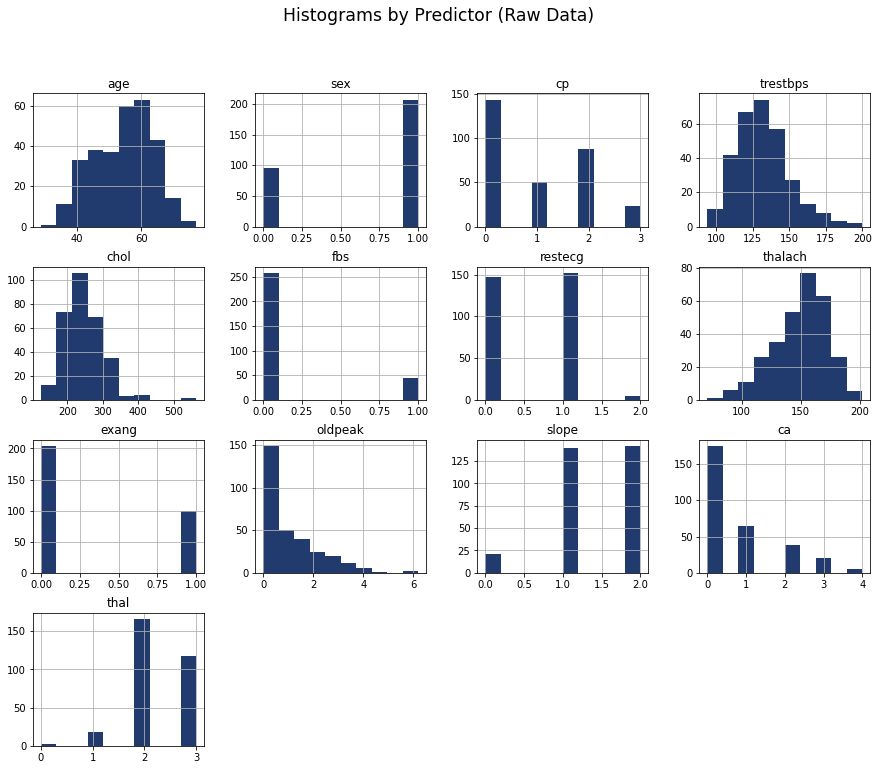

In [11]:
sns.set_palette('cividis')
X.hist(figsize=(15, 12))
plt.suptitle('Histograms by Predictor (Raw Data)', fontsize='xx-large')
plt.savefig('images/raw_hists_all.png')

In [12]:
y[y>0]=1

C:\Users\honey\AppData\Local\Temp\ipykernel_15688\1102512015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y>0]=1


In [13]:
y.value_counts()

1    165
0    138
Name: target, dtype: int64

In [14]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [15]:
df.to_csv('data/app_data.csv')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [17]:
baseline_classifiers = {'LogReg': LogisticRegression(random_state=42),
                        'KNN': KNeighborsClassifier(n_neighbors=3),
                        'SVC': SVC(gamma='auto', random_state=42),
                        'DT': DecisionTreeClassifier(random_state=42),
                        'RF': RandomForestClassifier(random_state=42),
                        'Ada': AdaBoostClassifier(DecisionTreeClassifier(random_state=42), random_state=42), 
                        'XGB': xgb.XGBClassifier(random_state=42)}

baseline_acc = {}
baseline_recall = {}
for clf in baseline_classifiers:
    name = clf
    clf = baseline_classifiers[clf]
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    acc = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    baseline_acc[name] = acc
    baseline_recall[name] = recall
    
print('Recall:')
print(pd.Series(baseline_recall).sort_values(ascending=False))
print('')
print('Accuracy:')
print(pd.Series(baseline_acc).sort_values(ascending=False))

AttributeError: 'str' object has no attribute 'decode'

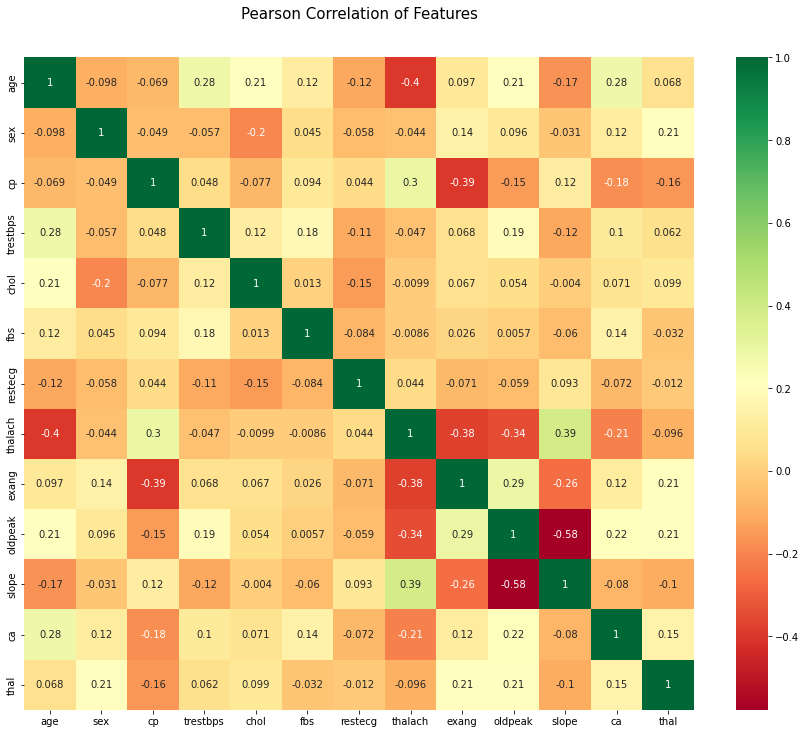

In [18]:
fig = plt.figure(figsize=(15,12))
ax = sns.heatmap(X.corr(),annot=True,cmap='RdYlGn')
# fig.set_size_inches(25,20)
#plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
plt.savefig('images/pearson.png')

In [19]:
ab=AdaBoostClassifier( RandomForestClassifier(random_state=42),n_estimators=100, random_state=42)
ab.fit(X_train, y_train)
pd.Series(ab.feature_importances_, index=X.columns).sort_values(ascending=False)

cp          0.133475
ca          0.125238
oldpeak     0.113144
thalach     0.109357
thal        0.107669
age         0.107121
chol        0.078522
trestbps    0.072603
exang       0.048777
slope       0.037605
sex         0.035762
restecg     0.019321
fbs         0.011406
dtype: float64

In [20]:
new_colspace = ['oldpeak', 'chol', 'age', 'trestbps', 'ca', 'cp', 'thal','sex','exang']
X_train = X_train[new_colspace]
X_test = X_test[new_colspace]

In [21]:
ss = StandardScaler()
X_train = pd.DataFrame(ss.fit_transform(X_train), columns=new_colspace)
X_test = pd.DataFrame(ss.transform(X_test), columns=new_colspace)

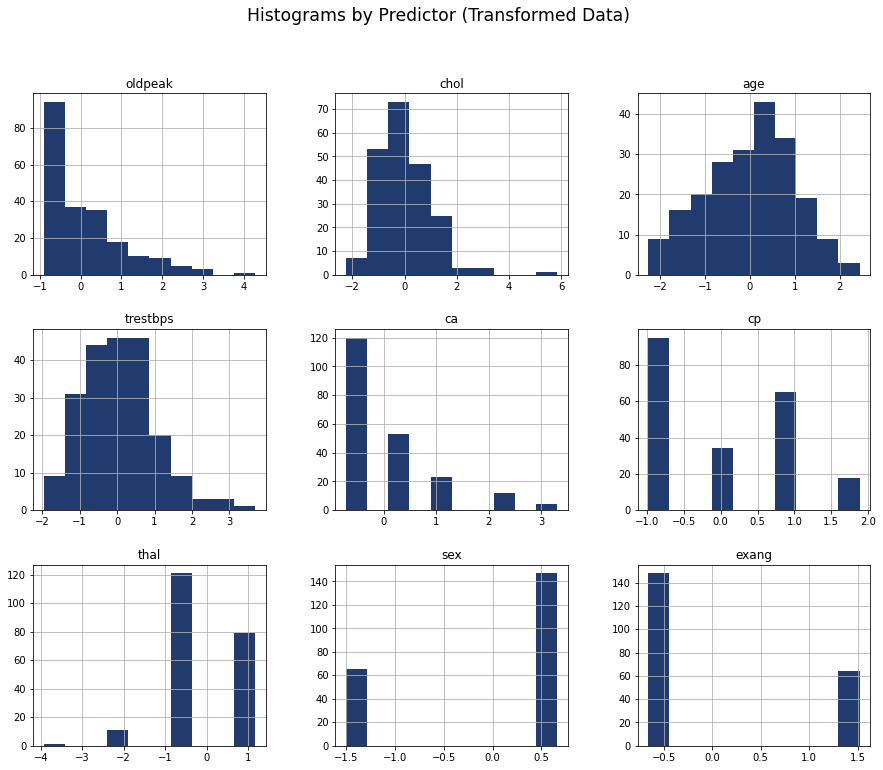

In [22]:
X_train.hist(figsize=(15, 12))
plt.suptitle('Histograms by Predictor (Transformed Data)', fontsize='xx-large')
plt.savefig('images/histograms_all_transformed.png')

In [23]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
accuracy=[]
recall=[]
precision=[]
f_score=[]

In [25]:
svc_classifier=SVC(C=0.1,kernel='linear',gamma='scale',random_state=42, probability=True)

svc_classifier.fit(X_train, y_train)

svc_classifier_tst=svc_classifier.predict(X_test)
print(f'Train Recall: {recall_score(y_train, svc_classifier.predict(X_train))}')
print(f'Test Recall: {recall_score(y_test, svc_classifier_tst)}')
recall.append(('svm',recall_score(y_test, svc_classifier_tst)))
print("")
print(f'Train Accuracy: {accuracy_score(y_train, svc_classifier.predict(X_train))}')
print(f'Test Accuracy: {accuracy_score(y_test, svc_classifier_tst)}')
accuracy.append(('svm',accuracy_score(y_test, svc_classifier_tst)))
print("")
print(f'Train Precison: {precision_score(y_train, svc_classifier.predict(X_train),pos_label=1)}')
print(f'Test Precision: {precision_score(y_test,svc_classifier_tst,pos_label=1)}')
precision.append(('svm',precision_score(y_test,svc_classifier_tst,pos_label=1)))
print("")
print(f'Train fscore: {f1_score(y_train,svc_classifier.predict(X_train),labels=[0,1],pos_label=1)}')
print(f'Test fscore: {f1_score(y_test,svc_classifier_tst,labels=[0,1],pos_label=1)}')
f_score.append(('svm',f1_score(y_test,svc_classifier_tst,labels=[0,1],pos_label=1)))

Train Recall: 0.957983193277311
Test Recall: 0.8478260869565217

Train Accuracy: 0.8632075471698113
Test Accuracy: 0.7802197802197802

Train Precison: 0.8260869565217391
Test Precision: 0.75

Train fscore: 0.88715953307393
Test fscore: 0.7959183673469389


Confusion matrix, without normalization


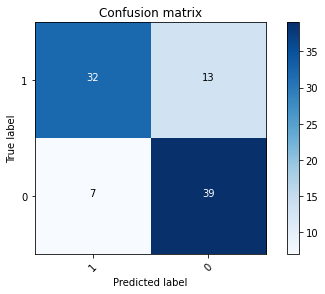

In [26]:
cms=metrics.confusion_matrix(y_test,svc_classifier_tst)
plot_confusion_matrix(cms,classes=[1,0])

In [27]:
logistic_regression=LogisticRegression(random_state=42)

logistic_regression.fit(X_train, y_train)

logistic_regression_tst=logistic_regression.predict(X_test)
print(f'Train Recall: {recall_score(y_train, logistic_regression.predict(X_train))}')
print(f'Test Recall: {recall_score(y_test, logistic_regression_tst)}')
print("")
print(f'Train Accuracy: {accuracy_score(y_train, logistic_regression.predict(X_train))}')
print(f'Test Accuracy: {accuracy_score(y_test, logistic_regression_tst)}')
print("")
print(f'Train Precison: {precision_score(y_train, logistic_regression.predict(X_train),pos_label=1)}')
print(f'Test Precision: {precision_score(y_test,logistic_regression_tst,pos_label=1)}')
print("")
print(f'Train fscore: {f1_score(y_train,logistic_regression.predict(X_train),labels=[0,1],pos_label=1)}')
print(f'Test fscore: {f1_score(y_test,logistic_regression_tst,labels=[0,1],pos_label=1)}')

recall.append(('logistic',recall_score(y_test, logistic_regression_tst)))
accuracy.append(('logistic',accuracy_score(y_test, logistic_regression_tst)))
precision.append(('logistic',precision_score(y_test,logistic_regression_tst,pos_label=1)))
f_score.append(('logistic',f1_score(y_test,logistic_regression_tst,labels=[0,1],pos_label=1)))

Train Recall: 0.8991596638655462
Test Recall: 0.8478260869565217

Train Accuracy: 0.8443396226415094
Test Accuracy: 0.8241758241758241

Train Precison: 0.8359375
Test Precision: 0.8125

Train fscore: 0.8663967611336032
Test fscore: 0.8297872340425533


Confusion matrix, without normalization


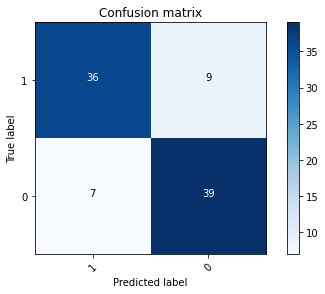

In [28]:
cms=metrics.confusion_matrix(y_test,logistic_regression_tst)
plot_confusion_matrix(cms,classes=[1,0])

In [29]:
decision_tree = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=5,min_samples_leaf=5,random_state=42)
decision_tree.fit(X_train, y_train)

decision_tree_tst=decision_tree.predict(X_test)
print(f'Train Recall: {recall_score(y_train, decision_tree.predict(X_train))}')
print(f'Test Recall: {recall_score(y_test, decision_tree_tst)}')
print("")
print(f'Train Accuracy: {accuracy_score(y_train, decision_tree.predict(X_train))}')
print(f'Test Accuracy: {accuracy_score(y_test, decision_tree_tst)}')
print("")
print(f'Train Precison: {precision_score(y_train, decision_tree.predict(X_train),pos_label=1)}')
print(f'Test Precision: {precision_score(y_test,decision_tree_tst,pos_label=1)}')
print("")
print(f'Train fscore: {f1_score(y_train,decision_tree.predict(X_train),labels=[0,1],pos_label=1)}')
print(f'Test fscore: {f1_score(y_test,decision_tree_tst,labels=[0,1],pos_label=1)}')

recall.append(('decision',recall_score(y_test, decision_tree_tst)))
accuracy.append(('decision',accuracy_score(y_test, decision_tree_tst)))
precision.append(('decision',precision_score(y_test,decision_tree_tst,pos_label=1)))
f_score.append(('decision',f1_score(y_test,decision_tree_tst,labels=[0,1],pos_label=1)))

Train Recall: 0.957983193277311
Test Recall: 0.8913043478260869

Train Accuracy: 0.8726415094339622
Test Accuracy: 0.7912087912087912

Train Precison: 0.8382352941176471
Test Precision: 0.7454545454545455

Train fscore: 0.8941176470588236
Test fscore: 0.8118811881188119


Confusion matrix, without normalization


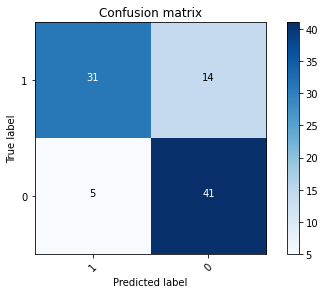

In [30]:
cms=metrics.confusion_matrix(y_test,decision_tree_tst)
plot_confusion_matrix(cms,classes=[1,0])

In [31]:
Random_forest = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=7,min_samples_split=10,min_samples_leaf=10,random_state=42)
Random_forest.fit(X_train, y_train)

Random_forest_tst=Random_forest.predict(X_test)
print(f'Train Recall: {recall_score(y_train, Random_forest.predict(X_train))}')
print(f'Test Recall: {recall_score(y_test, Random_forest_tst)}')
print("")
print(f'Train Accuracy: {accuracy_score(y_train, Random_forest.predict(X_train))}')
print(f'Test Accuracy: {accuracy_score(y_test, Random_forest_tst)}')
print("")
print(f'Train Precison: {precision_score(y_train, Random_forest.predict(X_train),pos_label=1)}')
print(f'Test Precision: {precision_score(y_test,Random_forest_tst,pos_label=1)}')
print("")
print(f'Train fscore: {f1_score(y_train,Random_forest.predict(X_train),labels=[0,1],pos_label=1)}')
print(f'Test fscore: {f1_score(y_test,Random_forest_tst,labels=[0,1],pos_label=1)}')

recall.append(('Random',recall_score(y_test, Random_forest_tst)))
accuracy.append(('Random',accuracy_score(y_test, Random_forest_tst)))
precision.append(('Random',precision_score(y_test,Random_forest_tst,pos_label=1)))
f_score.append(('Random',f1_score(y_test,Random_forest_tst,labels=[0,1],pos_label=1)))

Train Recall: 0.9495798319327731
Test Recall: 0.8913043478260869

Train Accuracy: 0.8867924528301887
Test Accuracy: 0.8021978021978022

Train Precison: 0.8625954198473282
Test Precision: 0.7592592592592593

Train fscore: 0.904
Test fscore: 0.8200000000000001


Confusion matrix, without normalization


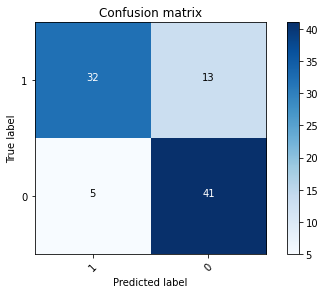

In [32]:
cms=metrics.confusion_matrix(y_test,Random_forest_tst)
plot_confusion_matrix(cms,classes=[1,0])

In [33]:
k_neighbors= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  

k_neighbors.fit(X_train, y_train)

k_neighbors_tst=k_neighbors.predict(X_test)
print(f'Train Recall: {recall_score(y_train, k_neighbors.predict(X_train))}')
print(f'Test Recall: {recall_score(y_test, k_neighbors_tst)}')
print("")
print(f'Train Accuracy: {accuracy_score(y_train, k_neighbors.predict(X_train))}')
print(f'Test Accuracy: {accuracy_score(y_test, k_neighbors_tst)}')
print("")
print(f'Train Precison: {precision_score(y_train, k_neighbors.predict(X_train),pos_label=1)}')
print(f'Test Precision: {precision_score(y_test,k_neighbors_tst,pos_label=1)}')
print("")
print(f'Train fscore: {f1_score(y_train,k_neighbors.predict(X_train),labels=[0,1],pos_label=1)}')
print(f'Test fscore: {f1_score(y_test,k_neighbors_tst,labels=[0,1],pos_label=1)}')

recall.append(('k_neighbors',recall_score(y_test, k_neighbors_tst)))
accuracy.append(('k_neighbors',accuracy_score(y_test, k_neighbors_tst)))
precision.append(('k_neighbors',precision_score(y_test,k_neighbors_tst,pos_label=1)))
f_score.append(('k_neighbors',f1_score(y_test,k_neighbors_tst,labels=[0,1],pos_label=1)))

Train Recall: 0.9159663865546218
Test Recall: 0.8478260869565217

Train Accuracy: 0.8773584905660378
Test Accuracy: 0.8021978021978022

Train Precison: 0.872
Test Precision: 0.78

Train fscore: 0.8934426229508197
Test fscore: 0.8125


Confusion matrix, without normalization


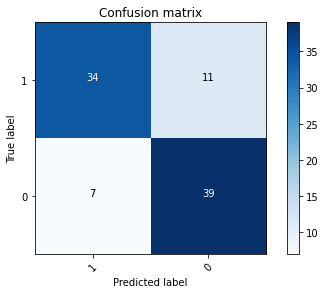

In [34]:
cms=metrics.confusion_matrix(y_test,k_neighbors_tst)
plot_confusion_matrix(cms,classes=[1,0])

In [35]:
ada_bst = AdaBoostClassifier(algorithm='SAMME.R', random_state=42,base_estimator=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=7,min_samples_split=10,min_samples_leaf=10,random_state=42), n_estimators= 10, learning_rate=.1)
ada_bst.fit(X_train, y_train)

ada_bst_tst=ada_bst.predict(X_test)
print(f'Train Recall: {recall_score(y_train, ada_bst.predict(X_train))}')
print(f'Test Recall: {recall_score(y_test, ada_bst_tst)}')
print("")
print(f'Train Accuracy: {accuracy_score(y_train,ada_bst.predict(X_train))}')
print(f'Test Accuracy: {accuracy_score(y_test, ada_bst_tst)}')
print("")
print(f'Train Precison: {precision_score(y_train, ada_bst.predict(X_train),pos_label=1)}')
print(f'Test Precision: {precision_score(y_test,ada_bst_tst,pos_label=1)}')
print("")
print(f'Train fscore: {f1_score(y_train,ada_bst.predict(X_train),labels=[0,1],pos_label=1)}')
print(f'Test fscore: {f1_score(y_test,ada_bst_tst,labels=[0,1],pos_label=1)}')

recall.append(('ada',recall_score(y_test, ada_bst_tst)))
accuracy.append(('ada',accuracy_score(y_test, ada_bst_tst)))
precision.append(('ada',precision_score(y_test,ada_bst_tst,pos_label=1)))
f_score.append(('ada',f1_score(y_test,ada_bst_tst,labels=[0,1],pos_label=1)))

Train Recall: 0.9411764705882353
Test Recall: 0.8478260869565217

Train Accuracy: 0.8915094339622641
Test Accuracy: 0.8131868131868132

Train Precison: 0.875
Test Precision: 0.7959183673469388

Train fscore: 0.9068825910931174
Test fscore: 0.8210526315789473


Confusion matrix, without normalization


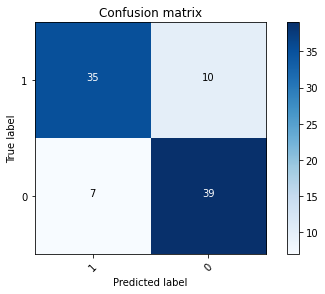

In [36]:
cms=metrics.confusion_matrix(y_test,ada_bst_tst)
plot_confusion_matrix(cms,classes=[1,0])

In [37]:
xgb_classifier = xgb.XGBClassifier(max_depth=1,
                        subsample=0.33,
                        objective='binary:logistic',
                        n_estimators=300)

xgb_classifier.fit(X_train, y_train)

xgb_classifier_tst=xgb_classifier.predict(X_test)
print(f'Train Recall: {recall_score(y_train, xgb_classifier.predict(X_train))}')
print(f'Test Recall: {recall_score(y_test, xgb_classifier_tst)}')
print("")
print(f'Train Accuracy: {accuracy_score(y_train, xgb_classifier.predict(X_train))}')
print(f'Test Accuracy: {accuracy_score(y_test, xgb_classifier_tst)}')
print("")
print(f'Train Precison: {precision_score(y_train, xgb_classifier.predict(X_train),pos_label=1)}')
print(f'Test Precision: {precision_score(y_test,xgb_classifier_tst,pos_label=1)}')
print("")
print(f'Train fscore: {f1_score(y_train,xgb_classifier.predict(X_train),labels=[0,1],pos_label=1)}')
print(f'Test fscore: {f1_score(y_test,xgb_classifier_tst,labels=[0,1],pos_label=1)}')

recall.append(('xg',recall_score(y_test, xgb_classifier_tst)))
accuracy.append(('xg',accuracy_score(y_test, xgb_classifier_tst)))
precision.append(('xg',precision_score(y_test,xgb_classifier_tst,pos_label=1)))
f_score.append(('xg',f1_score(y_test,xgb_classifier_tst,labels=[0,1],pos_label=1)))

c:\users\honey\anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:31:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Recall: 0.957983193277311
Test Recall: 0.8478260869565217

Train Accuracy: 0.9339622641509434
Test Accuracy: 0.8351648351648352

Train Precison: 0.926829268292683
Test Precision: 0.8297872340425532

Train fscore: 0.9421487603305786
Test fscore: 0.8387096774193549


Confusion matrix, without normalization


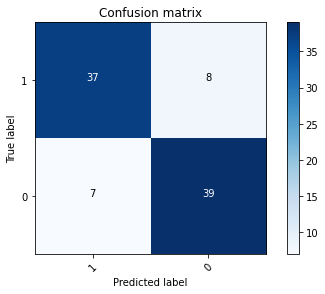

In [38]:
cms=metrics.confusion_matrix(y_test,xgb_classifier_tst)
plot_confusion_matrix(cms,classes=[1,0])

Text(0.5, 1.0, 'F1 SCORE')

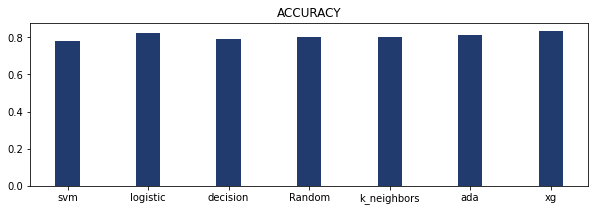

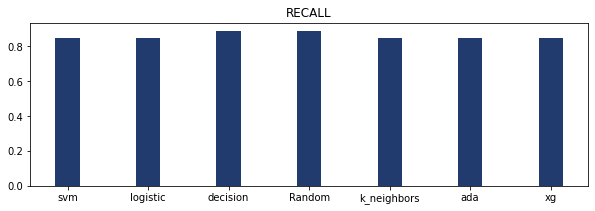

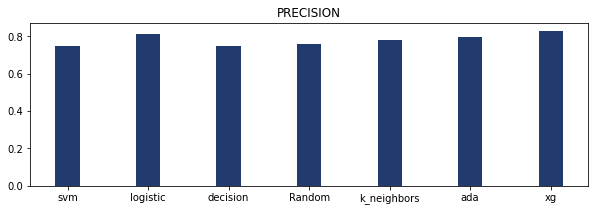

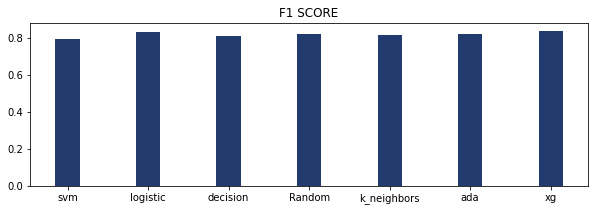

In [39]:
labels, ys = zip(*accuracy) 
plt.figure(figsize=(10, 3))  # width:20, height:3
plt.bar(labels, ys, align='center', width=0.3)
plt.title('ACCURACY')

labels, ys = zip(*recall) 
plt.figure(figsize=(10, 3))  # width:20, height:3
plt.bar(labels, ys, align='center', width=0.3)
plt.title('RECALL')

labels, ys = zip(*precision) 
plt.figure(figsize=(10, 3))  # width:20, height:3
plt.bar(labels, ys, align='center', width=0.3)
plt.title('PRECISION')

labels, ys = zip(*f_score) 
plt.figure(figsize=(10, 3))  # width:20, height:3
plt.bar(labels, ys, align='center', width=0.3)
plt.title('F1 SCORE')

In [40]:
def heart_disease_det(oldpeak,chol,age,trestbps,ca,cp,thal,sex,exang):
    input_data = np.array([oldpeak,chol,age,trestbps,ca,cp,thal,sex,exang])
    input_data.shape=(1,9)
    #input_data = pd.DataFrame(input_data,columns=new_colspace)
    input_data = pd.DataFrame(ss.transform(input_data), columns=new_colspace)
    prediction = xgb_classifier.predict(input_data)
    return prediction

In [41]:
print(heart_disease_det(2.8,169,44,120,0,0,1,1,1))

[0]


In [42]:
pickle.dump(xgb_classifier, open('heart_disease_detector.pkl', 'wb'))# load model
#heart_disease_detector_model = pickle.load(open('heart_disease_detector.pkl', 'rb'))